In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df = pd.read_parquet('train.parquet')

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      80000 non-null  int64  
 1   dates   80000 non-null  object 
 2   values  80000 non-null  object 
 3   label   80000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.4+ MB


In [ ]:
train_df.head()

,id,dates,values,label
0,19114,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-1.86, 0.79, 1.4, 0.15, 0.0, -1.24, -1.46, 3....",0.0
1,22769,"[2016-05-01, 2016-06-01, 2016-07-01, 2016-08-0...","[-1.04, -3.48, 0.05, -0.13, -0.01, 0.03, 0.27,...",1.0
2,76935,"[2017-03-01, 2017-04-01, 2017-05-01, 2017-06-0...","[0.28, 0.63, 0.06, 0.96, -1.4, -0.3, 1.62, 1.1...",0.0
3,66297,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-0.33, 0.58, 1.1, -0.56, -0.95, -0.61, -0.7, ...",0.0
4,2191,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[1.31, 0.5, -0.54, 0.95, 0.65, 0.83, -1.55, -0...",0.0


In [ ]:
train_df.isnull().sum()

,0
id,0
dates,0
values,0
label,0


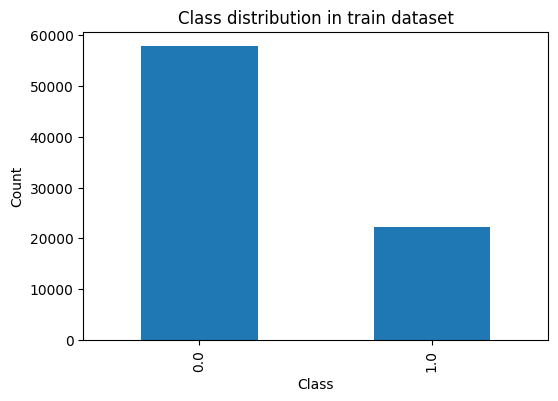

In [ ]:
plt.figure(figsize=(6, 4))
train_df['label'].value_counts().plot(kind='bar', title='Class distribution in train dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
#преобладает 0 класс

In [ ]:
train_df['dates'] = train_df['dates'].apply(lambda x: [pd.to_datetime(d) for d in x])
#test_df['dates'] = test_df['dates'].apply(lambda x: [pd.to_datetime(d) for d in x])
train_df.head()


,id,dates,values,label
0,19114,"[2016-01-01 00:00:00, 2016-02-01 00:00:00, 201...","[-1.86, 0.79, 1.4, 0.15, 0.0, -1.24, -1.46, 3....",0.0
1,22769,"[2016-05-01 00:00:00, 2016-06-01 00:00:00, 201...","[-1.04, -3.48, 0.05, -0.13, -0.01, 0.03, 0.27,...",1.0
2,76935,"[2017-03-01 00:00:00, 2017-04-01 00:00:00, 201...","[0.28, 0.63, 0.06, 0.96, -1.4, -0.3, 1.62, 1.1...",0.0
3,66297,"[2016-01-01 00:00:00, 2016-02-01 00:00:00, 201...","[-0.33, 0.58, 1.1, -0.56, -0.95, -0.61, -0.7, ...",0.0
4,2191,"[2016-01-01 00:00:00, 2016-02-01 00:00:00, 201...","[1.31, 0.5, -0.54, 0.95, 0.65, 0.83, -1.55, -0...",0.0


In [ ]:
train_expanded = train_df.explode(['dates', 'values'])
train_expanded.head(10)


,id,dates,values,label
0,19114,2016-01-01,-1.86,0.0
0,19114,2016-02-01,0.79,0.0
0,19114,2016-03-01,1.4,0.0
0,19114,2016-04-01,0.15,0.0
0,19114,2016-05-01,0.0,0.0
0,19114,2016-06-01,-1.24,0.0
0,19114,2016-07-01,-1.46,0.0
0,19114,2016-08-01,3.49,0.0
0,19114,2016-09-01,1.2,0.0
0,19114,2016-10-01,1.93,0.0


In [ ]:
train_expanded.dtypes

,0
id,int64
dates,datetime64[ns]
values,object
label,float64


In [ ]:
train_expanded['values'] = pd.to_numeric(train_expanded['values'])

In [ ]:
train_expanded.dtypes

,0
id,int64
dates,datetime64[ns]
values,float64
label,float64


In [ ]:
train_expanded.isna().sum()

,0
id,0
dates,0
values,4582
label,0


In [ ]:
train_expanded['values'].fillna(train_expanded['values'].mean(), inplace=True)

<ipython-input-20-d9b2d4ade193>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_expanded['values'].fillna(train_expanded['values'].mean(), inplace=True)


In [ ]:
train_expanded.isna().sum()

,0
id,0
dates,0
values,0
label,0


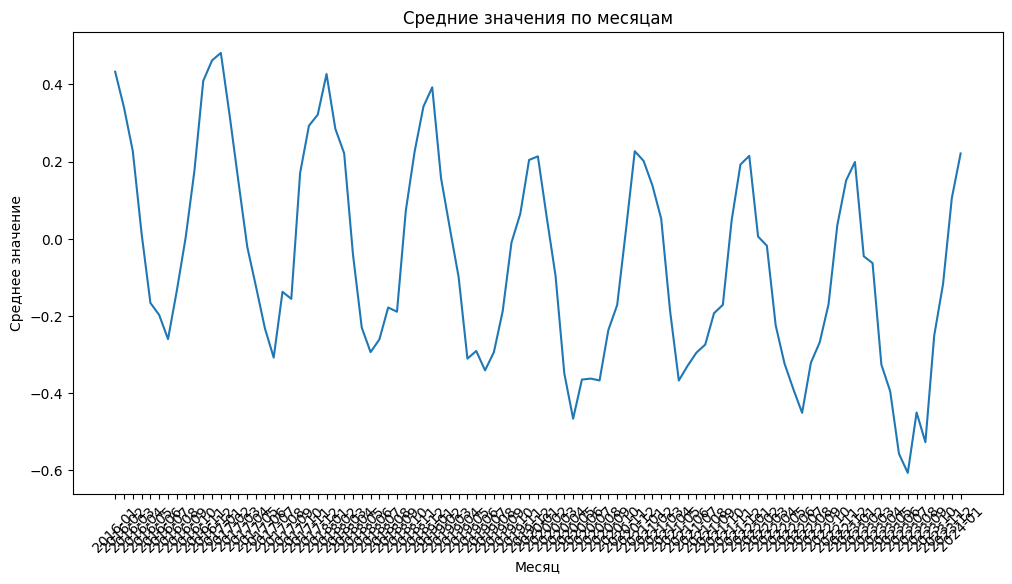

In [ ]:
train_expanded['month'] = train_expanded['dates'].dt.to_period('M')
monthly_values = train_expanded.groupby('month')['values'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(monthly_values['month'].astype(str), monthly_values['values'])
plt.xticks(rotation=45)
plt.title('Средние значения по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Среднее значение')
plt.show()


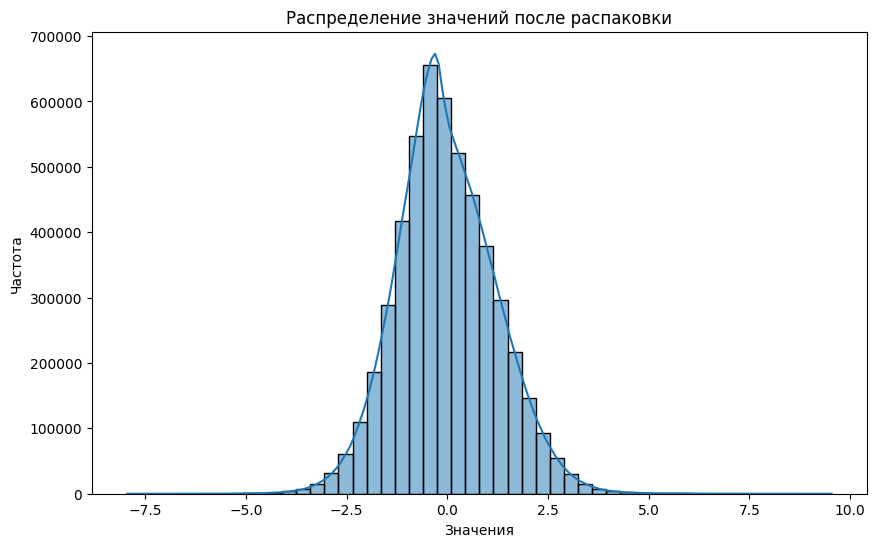

In [ ]:
#посмотрим как распределены значения values
plt.figure(figsize=(10, 6))
sns.histplot(train_expanded['values'], bins=50, kde=True)
plt.title('Распределение значений после распаковки')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.show()


In [ ]:
#распределение нормальное

In [ ]:
from scipy import stats
class_0 = train_expanded[train_expanded['label'] == 0]['values']
class_1 = train_expanded[train_expanded['label'] == 1]['values']

In [ ]:
#t-тест
t_stat, p_value = stats.ttest_ind(class_0, class_1)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Средние значения различаются.")
else:
    print("Средние значения не различаются.")

T-statistic: 91.78831444749032, P-value: 0.0
Средние значения различаются.


**Генерация признаков**

In [ ]:
import numpy as np
train_expanded['year'] = train_expanded['dates'].dt.year
train_expanded['month'] = train_expanded['dates'].dt.month
train_expanded['day'] = train_expanded['dates'].dt.day
train_expanded['day_of_week'] = train_expanded['dates'].dt.dayofweek
train_expanded['is_weekend'] = np.where(train_expanded['day_of_week'] >= 5, 1, 0)

train_expanded['lag_1'] = train_expanded.groupby('id')['values'].shift(1)
train_expanded['lag_2'] = train_expanded.groupby('id')['values'].shift(2)
train_expanded['lag_3'] = train_expanded.groupby('id')['values'].shift(3)

train_expanded['mean_value'] = train_expanded.groupby('id')['values'].transform('mean')
train_expanded['std_value'] = train_expanded.groupby('id')['values'].transform('std')
train_expanded['min_value'] = train_expanded.groupby('id')['values'].transform('min')
train_expanded['max_value'] = train_expanded.groupby('id')['values'].transform('max')

train_expanded.head()


,id,dates,values,label,month,year,day,day_of_week,is_weekend,lag_1,lag_2,lag_3,mean_value,std_value,min_value,max_value
0,19114,2016-01-01,-1.86,0.0,1,2016,1,4,0,NaN,NaN,NaN,0.02371,1.348189,-4.84,3.49
0,19114,2016-02-01,0.79,0.0,2,2016,1,0,0,-1.86,NaN,NaN,0.02371,1.348189,-4.84,3.49
0,19114,2016-03-01,1.40,0.0,3,2016,1,1,0,0.79,-1.86,NaN,0.02371,1.348189,-4.84,3.49
0,19114,2016-04-01,0.15,0.0,4,2016,1,4,0,1.40,0.79,-1.86,0.02371,1.348189,-4.84,3.49
0,19114,2016-05-01,0.00,0.0,5,2016,1,6,1,0.15,1.40,0.79,0.02371,1.348189,-4.84,3.49


In [ ]:
train_expanded.isna().sum()

,0
id,0
dates,0
values,0
label,0
month,0
year,0
day,0
day_of_week,0
is_weekend,0
lag_1,80000


In [ ]:
train_expanded['lag_1'].fillna(method='ffill', inplace=True)
train_expanded['lag_2'].fillna(method='ffill', inplace=True)
train_expanded['lag_3'].fillna(method='ffill', inplace=True)

<ipython-input-29-1bea1940295e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_expanded['lag_1'].fillna(method='ffill', inplace=True)
<ipython-input-29-1bea1940295e>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_expanded['lag_1'].fillna(method='ffill', inplace=True)
<ipython-input-29-1bea1940295e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace me

In [ ]:
train_expanded.isna().sum()

,0
id,0
dates,0
values,0
label,0
month,0
year,0
day,0
day_of_week,0
is_weekend,0
lag_1,1


In [ ]:
train_expanded['label'] = train_expanded['label'].astype(int)

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
X = train_expanded[['month',	'year',	'day',	'day_of_week',	'is_weekend',	'lag_1',	'lag_2',	'lag_3',	'mean_value',	'std_value',	'min_value',	'max_value']]
y = train_expanded['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.9 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    task_type='GPU')
model.fit(X, y)


0:	learn: 0.6398248	total: 71.7ms	remaining: 1m 11s
1:	learn: 0.5985306	total: 132ms	remaining: 1m 6s
2:	learn: 0.5668848	total: 196ms	remaining: 1m 5s
3:	learn: 0.5434062	total: 255ms	remaining: 1m 3s
4:	learn: 0.5241795	total: 304ms	remaining: 1m
5:	learn: 0.5100552	total: 348ms	remaining: 57.6s
6:	learn: 0.4977604	total: 393ms	remaining: 55.8s
7:	learn: 0.4884042	total: 439ms	remaining: 54.4s
8:	learn: 0.4813288	total: 482ms	remaining: 53.1s
9:	learn: 0.4758258	total: 528ms	remaining: 52.3s
10:	learn: 0.4707352	total: 571ms	remaining: 51.3s
11:	learn: 0.4672501	total: 612ms	remaining: 50.4s
12:	learn: 0.4640623	total: 653ms	remaining: 49.6s
13:	learn: 0.4611453	total: 694ms	remaining: 48.9s
14:	learn: 0.4592004	total: 739ms	remaining: 48.5s
15:	learn: 0.4572620	total: 785ms	remaining: 48.2s
16:	learn: 0.4557374	total: 850ms	remaining: 49.1s
17:	learn: 0.4542820	total: 894ms	remaining: 48.7s
18:	learn: 0.4534698	total: 935ms	remaining: 48.3s
19:	learn: 0.4525823	total: 977ms	remainin

In [ ]:
from catboost import CatBoostClassifier
catboost = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    task_type='GPU')
catboost.fit(X_train, y_train)

0:	learn: 0.6398585	total: 177ms	remaining: 2m 56s
1:	learn: 0.5985982	total: 304ms	remaining: 2m 31s
2:	learn: 0.5669695	total: 425ms	remaining: 2m 21s
3:	learn: 0.5434536	total: 517ms	remaining: 2m 8s
4:	learn: 0.5240231	total: 566ms	remaining: 1m 52s
5:	learn: 0.5098663	total: 613ms	remaining: 1m 41s
6:	learn: 0.4984310	total: 662ms	remaining: 1m 33s
7:	learn: 0.4885924	total: 699ms	remaining: 1m 26s
8:	learn: 0.4810659	total: 737ms	remaining: 1m 21s
9:	learn: 0.4747492	total: 816ms	remaining: 1m 20s
10:	learn: 0.4700546	total: 897ms	remaining: 1m 20s
11:	learn: 0.4664370	total: 1.02s	remaining: 1m 23s
12:	learn: 0.4638427	total: 1.12s	remaining: 1m 25s
13:	learn: 0.4609505	total: 1.24s	remaining: 1m 27s
14:	learn: 0.4588040	total: 1.31s	remaining: 1m 26s
15:	learn: 0.4568982	total: 1.36s	remaining: 1m 23s
16:	learn: 0.4554352	total: 1.42s	remaining: 1m 22s
17:	learn: 0.4542922	total: 1.54s	remaining: 1m 24s
18:	learn: 0.4532235	total: 1.63s	remaining: 1m 24s
19:	learn: 0.4521778	to

In [ ]:
y_pred_proba = catboost.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'roc auc для catboost: {roc_auc:.4f}')

ROC AUC: 0.8631


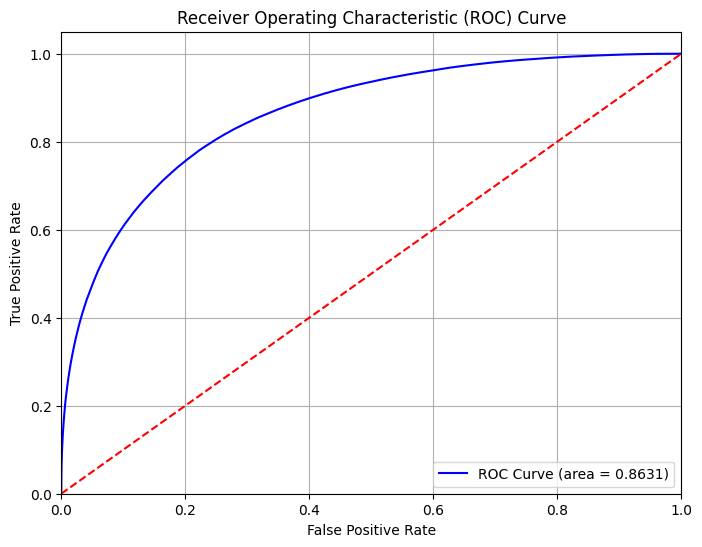

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
!pip install xgboost lightgbm

In [ ]:
import xgboost as xgb
import lightgbm as lgb

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss',tree_method='gpu_hist')
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:19:39] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:19:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
print(f'roc auc для xgboost: {roc_auc_xgb:.4f}')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:20:16] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:20:16] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


ROC AUC для XGBoost: 0.8716


In [ ]:
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 987996, number of negative: 2620792
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.115739 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1817
[LightGBM] [Info] Number of data points in the train set: 3608788, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.273775 -> initscore=-0.975553
[LightGBM] [Info] Start training from score -0.975553


LGBMClassifier()

In [ ]:
y_pred_proba_lgb = lgb_model.predict_proba(X_test)[:, 1]
roc_auc_lgb = roc_auc_score(y_test, y_pred_proba_lgb)
print(f'roc auc для lightgbm: {roc_auc_lgb:.4f}')

ROC AUC для LightGBM: 0.8440


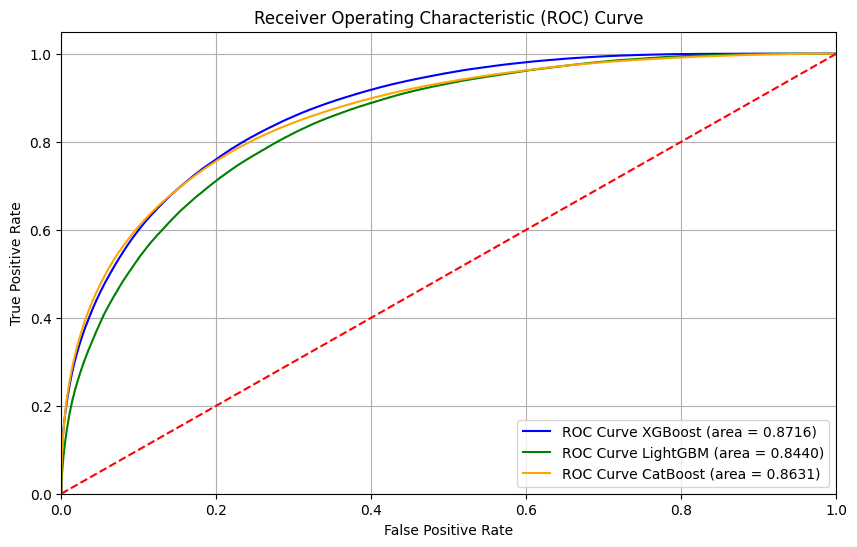

In [ ]:

roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
roc_auc_lgb = roc_auc_score(y_test, y_pred_proba_lgb)
roc_auc_catboost = roc_auc_score(y_test, y_pred_proba)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_pred_proba_lgb)
fpr_catboost, tpr_catboost, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 6))
plt.plot(fpr_xgb, tpr_xgb, color='blue', label=f'ROC Curve XGBoost (area = {roc_auc_xgb:.4f})')
plt.plot(fpr_lgb, tpr_lgb, color='green', label=f'ROC Curve LightGBM (area = {roc_auc_lgb:.4f})')
plt.plot(fpr_catboost, tpr_catboost, color='orange', label=f'ROC Curve CatBoost (area = {roc_auc_catboost:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
#xgboost в целом немного лучше различает классы, но catboost

In [ ]:
catboost.save_model('catboost_model.cbm')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:18:05] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
